In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
#Load dataset
data = pd.read_csv('heart.csv')
data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


# (EDA)

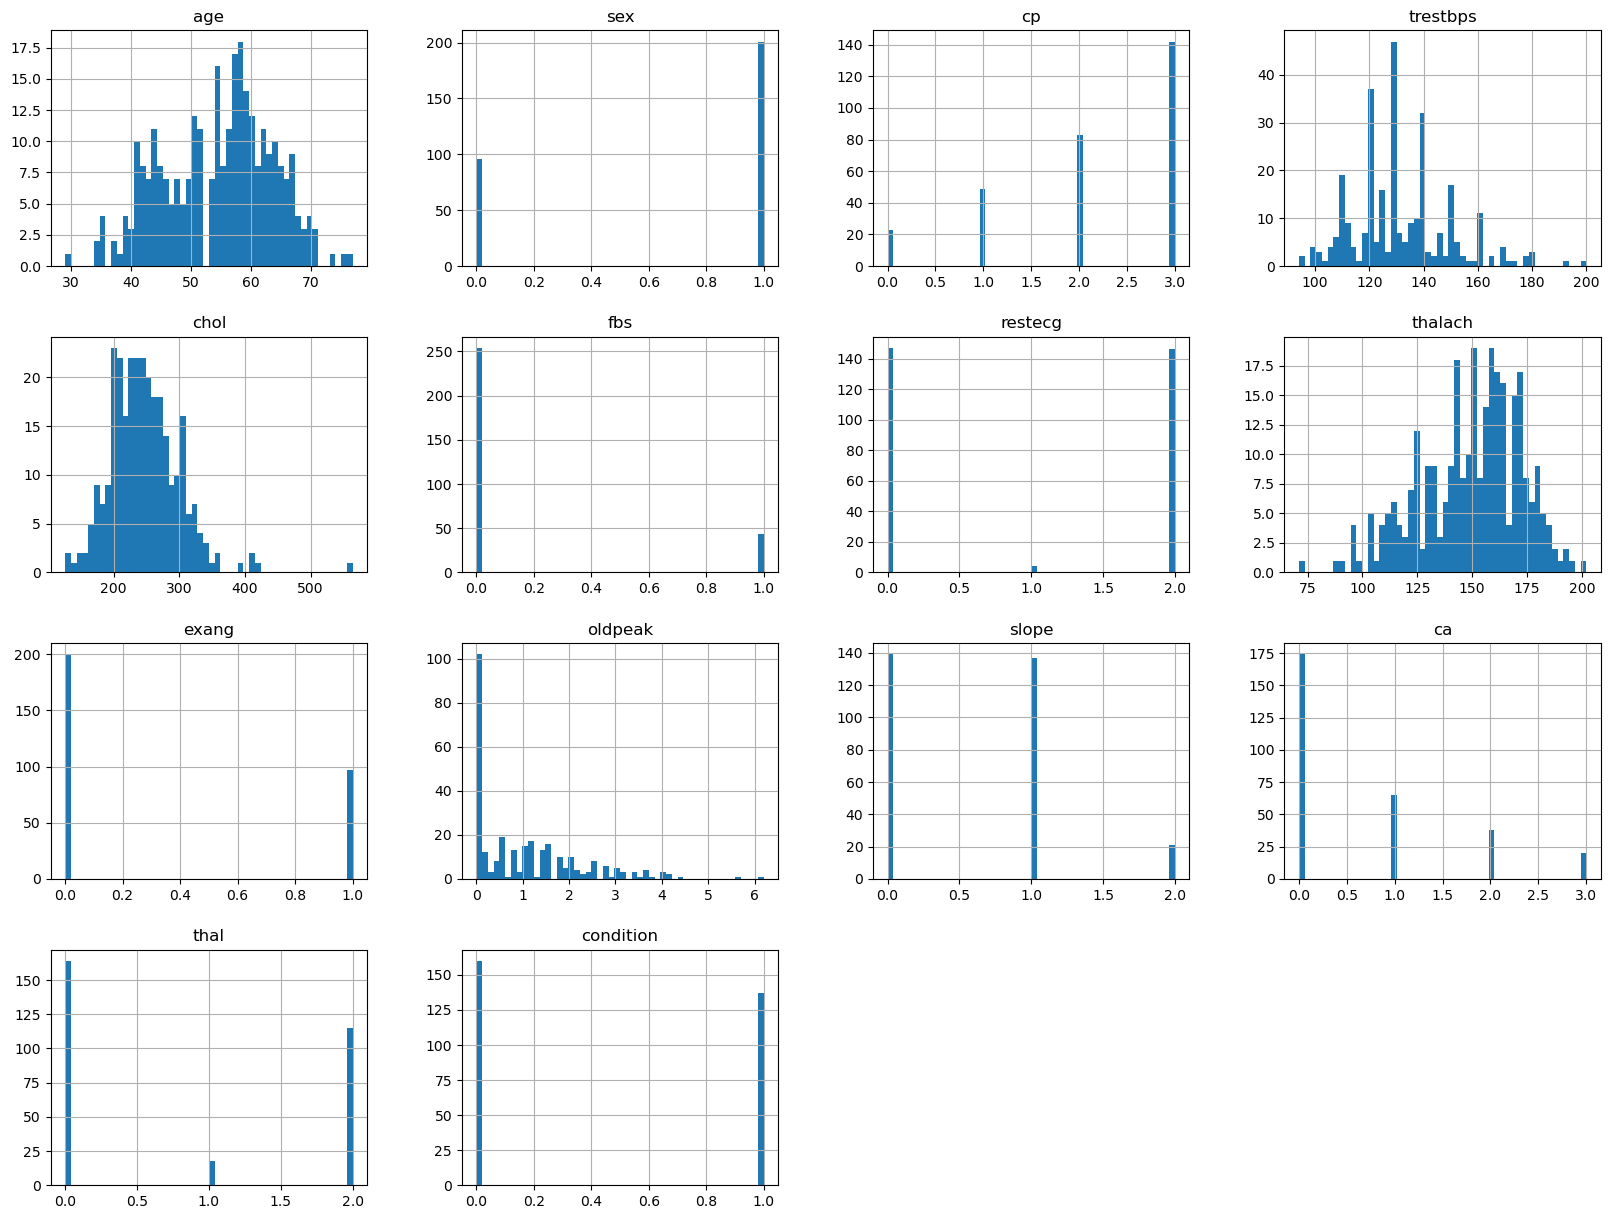

In [3]:
# Visualize histograms
data.hist(bins=50, figsize=(20, 15))
plt.show()

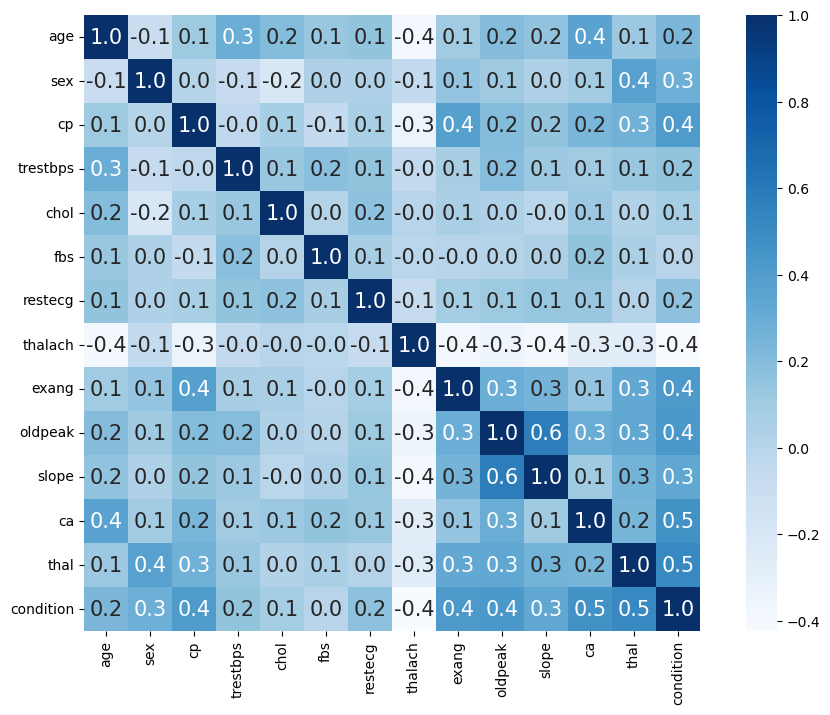

In [4]:
# Visualize correlation using a heatmap
corr = data.corr()
corr.shape

# Plotting the heatmap of correlation between features
plt.figure(figsize=(12, 8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':15}, cmap='Blues')
plt.show()

In [5]:
# Check for null values
null= data.isnull().sum()
null

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

# Preprocessing:

In [6]:
# Spliting target variable and independent variables
X = data.drop("condition", axis=1)
y = data["condition"]

In [7]:
# Splitting to training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Normalize the data using StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model Building:

In [10]:
#create a logisticregression:
lr = LogisticRegression(max_iter=400)
lr.fit(X_train_scaled,y_train)

LogisticRegression(max_iter=400)

In [11]:
#make predictions using the testing set:
y_pred = lr.predict(X_train_scaled)


In [12]:
#create a simple nrural networkvmodel:
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])


In [13]:
#compile the model:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [14]:
#Train the model:
model.fit(X_train_scaled, y_train, epochs=10, batch_size=16)

Epoch 1/10
15/15 [==============================] - 1s 4ms/step - loss: 0.5977 - accuracy: 0.7384
Epoch 2/10
15/15 [==============================] - 0s 4ms/step - loss: 0.4264 - accuracy: 0.8692
Epoch 3/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3403 - accuracy: 0.8861
Epoch 4/10
15/15 [==============================] - 0s 3ms/step - loss: 0.3021 - accuracy: 0.8903
Epoch 5/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2755 - accuracy: 0.8903
Epoch 6/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.8861
Epoch 7/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2510 - accuracy: 0.8861
Epoch 8/10
15/15 [==============================] - 0s 2ms/step - loss: 0.2345 - accuracy: 0.8861
Epoch 9/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2219 - accuracy: 0.9030
Epoch 10/10
15/15 [==============================] - 0s 3ms/step - loss: 0.2125 - accuracy: 0.8987


# Evaluation:

In [15]:
# For Logistic Regression
lr_accuracy = lr.score(X_test_scaled, y_test)
lr_predictions = lr.predict(X_test_scaled)

In [16]:
# For Neural Network
nk_evaluation = model.evaluate(X_test_scaled, y_test)

2/2 [==============================] - 0s 7ms/step - loss: 0.6304 - accuracy: 0.7333


In [17]:
# Calculate additional metrics like precision, recall, and F1 score
precision = precision_score(y_test, lr_predictions)
recall = recall_score(y_test, lr_predictions)
f1 = f1_score(y_test, lr_predictions)


print('precision: ',precision)
print('recall: ',recall)
print('f1 : ',f1)

precision:  0.7
recall:  0.75
f1 :  0.7241379310344827
